### Project 2: COVID TRACKER

# COVID-19 Exploratory Data Analysis (EDA)

### Step 1:Dataset Fields

- `Date_reported`: Date of reporting
- `Country_Code`: ISO country code
- `Country`: Country name
- `WHO_region`: WHO region classification
- `New_cases`: Daily new cases (18,729 missing)
- `Cumulative_cases`: Total cases to date
- `New_deaths`: Daily new deaths (30,306 missing)
- `Cumulative_deaths`: Total deaths to date

## Step 2: Import Libraries and Load Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('WHO-COVID-19-global-daily-data.csv')

# Convert Date_reported to datetime format
df['Date_reported'] = pd.to_datetime(df['Date_reported'], errors='coerce')

# Check the first few rows and data types
print(df.head())
print(df.dtypes)


  Date_reported Country_code     Country WHO_region  New_cases  \
0    2020-01-04           AI    Anguilla        AMR        NaN   
1    2020-01-04           AZ  Azerbaijan        EUR        NaN   
2    2020-01-04           BD  Bangladesh       SEAR        0.0   
3    2020-01-04           BB    Barbados        AMR        NaN   
4    2020-01-04           BR      Brazil        AMR        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         0.0                  0  
3                 0         NaN                  0  
4                 0         NaN                  0  
Date_reported        datetime64[ns]
Country_code                 object
Country                      object
WHO_region                   object
New_cases                   float64
Cumulative_cases              int64
New_deaths                  float64
Cumulative_deaths             int

## Step 3: Correcting Inconsistencies

In [3]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
df = df.drop_duplicates()

# Check for negative values in cases and deaths
invalid_cases = df[df['New_cases'] < 0]
invalid_deaths = df[df['New_deaths'] < 0]
print(f"Rows with negative New_cases: {len(invalid_cases)}")
print(f"Rows with negative New_deaths: {len(invalid_deaths)}")

# Replace negative values with 0 (or handle as per domain knowledge)
df.loc[df['New_cases'] < 0, 'New_cases'] = 0
df.loc[df['New_deaths'] < 0, 'New_deaths'] = 0

Number of duplicate rows: 0
Rows with negative New_cases: 69
Rows with negative New_deaths: 30


## Step 4: Handling Missing Values

In [5]:
# Check missing values
print(df.isnull().sum())

# Option 1: Fill missing values with 0
df['New_cases'] = df['New_cases'].fillna(0)
df['New_deaths'] = df['New_deaths'].fillna(0)

# Option 2: Interpolate for time-series (if sorted by date per country)
df = df.sort_values(['Country', 'Date_reported'])
df['New_cases'] = df.groupby('Country')['New_cases'].transform(lambda x: x.interpolate(method='linear', limit_direction='both'))
df['New_deaths'] = df.groupby('Country')['New_deaths'].transform(lambda x: x.interpolate(method='linear', limit_direction='both'))

# Recheck missing values
print(df.isnull().sum())

Date_reported             0
Country_code           1885
Country                   0
WHO_region                0
New_cases            244472
Cumulative_cases          0
New_deaths           299601
Cumulative_deaths         0
dtype: int64
Date_reported           0
Country_code         1885
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64


## Step 5: Descriptive Statistics

In [7]:
# Descriptive statistics
print(df.describe())

# Additional stats
print(f"Mean New_cases: {df['New_cases'].mean()}")
print(f"Median Cumulative_deaths: {df['Cumulative_deaths'].median()}")
print(f"Most frequent Country: {df['Country'].mode()[0]}")

                       Date_reported     New_cases  Cumulative_cases  \
count                         452400  4.524000e+05      4.524000e+05   
mean   2022-08-03 00:00:00.000000256  1.719001e+03      1.946779e+06   
min              2020-01-04 00:00:00  0.000000e+00      0.000000e+00   
25%              2021-04-19 00:00:00  0.000000e+00      5.697000e+03   
50%              2022-08-03 00:00:00  0.000000e+00      5.258000e+04   
75%              2023-11-17 00:00:00  4.100000e+01      6.201680e+05   
max              2025-03-02 00:00:00  6.966046e+06      1.034368e+08   
std                              NaN  3.316475e+04      8.249626e+06   

          New_deaths  Cumulative_deaths  
count  452400.000000       4.524000e+05  
mean       15.686583       2.103049e+04  
min         0.000000       0.000000e+00  
25%         0.000000       3.500000e+01  
50%         0.000000       6.700000e+02  
75%         0.000000       7.574000e+03  
max     44047.000000       1.219038e+06  
std       142.8

## Step 6: Correlation Analysis

                   New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
New_cases           1.000000          0.123235    0.273363           0.100790
Cumulative_cases    0.123235          1.000000    0.163568           0.788077
New_deaths          0.273363          0.163568    1.000000           0.243370
Cumulative_deaths   0.100790          0.788077    0.243370           1.000000


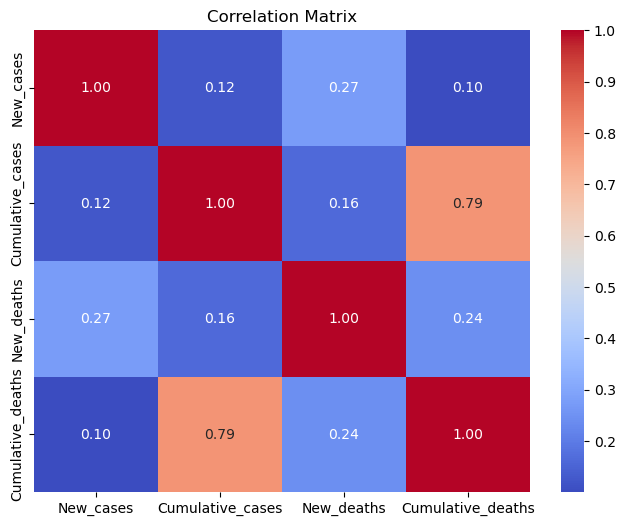

In [9]:
# Correlation matrix
correlation = df[['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']].corr()
print(correlation)

# Visualize correlation with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Step 7: Data Visualization

Time Series Plot

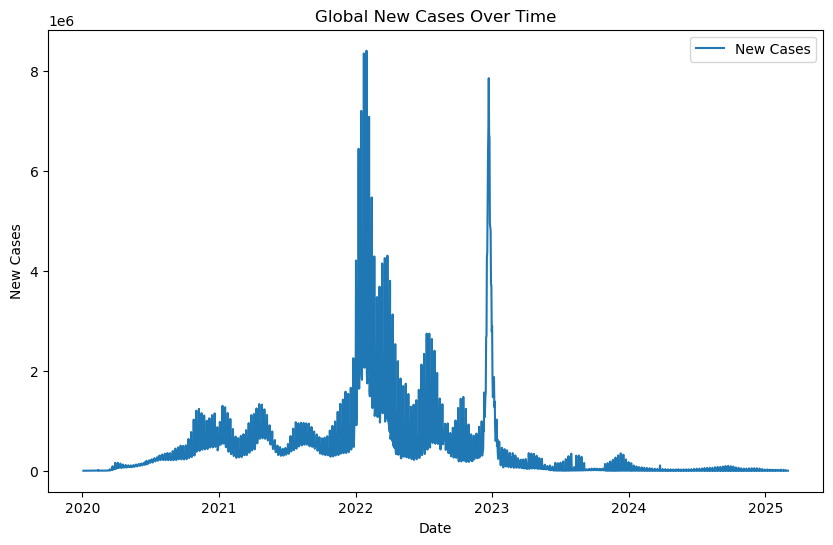

In [11]:
# Time series plot of New_cases globally
global_cases = df.groupby('Date_reported')['New_cases'].sum()
plt.figure(figsize=(10, 6))
plt.plot(global_cases.index, global_cases.values, label='New Cases')
plt.title('Global New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()



 Bar Chart

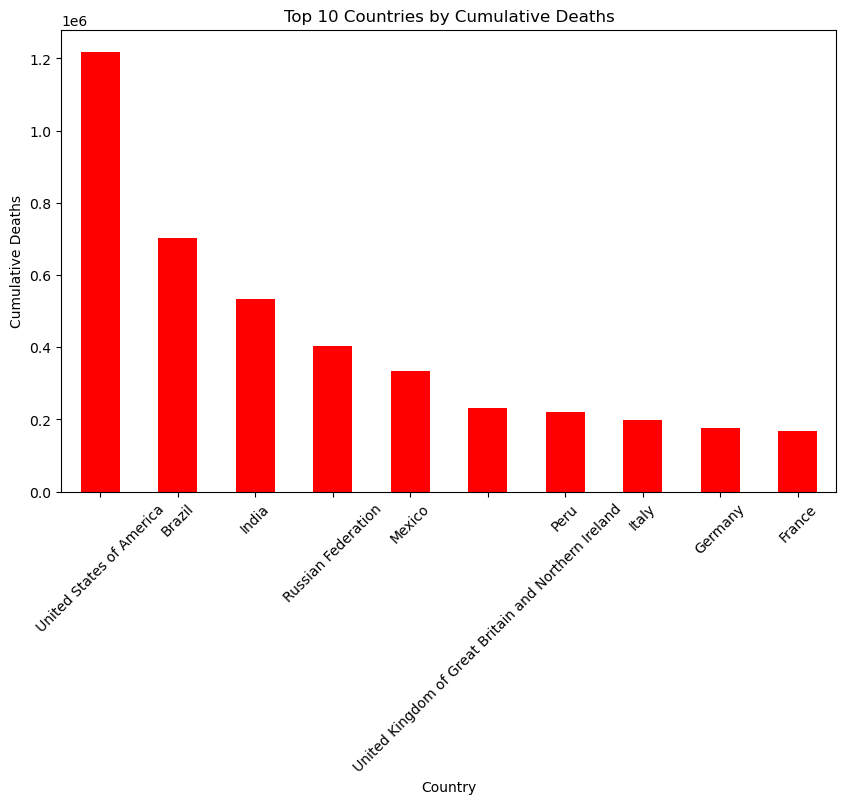

In [13]:
# Bar chart of Cumulative_deaths by Country (top 10)
top_countries = df.groupby('Country')['Cumulative_deaths'].max().nlargest(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='red')
plt.title('Top 10 Countries by Cumulative Deaths')
plt.xlabel('Country')
plt.ylabel('Cumulative Deaths')
plt.xticks(rotation=45)
plt.show()

## Step 8: Export Cleaned Data

In [17]:
output_file = "cleaned_covid_data.csv"
df.to_csv(output_file, index=False)
print(f"Cleaned dataset saved as {output_file}")

Cleaned dataset saved as cleaned_covid_data.csv
